# Section 1: Creating and Testing the CNN

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import RMSprop

import keras.layers as layers
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import losses 
from keras import optimizers 
from keras import metrics

import numpy as np

import pandas as pd

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

import os
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt

from pprint import pprint

from PIL import Image
import numpy as np
from skimage import transform

In [2]:
def plot_hist(hist):
    plt.plot(hist.history["binary_accuracy"])
    plt.plot(hist.history["val_binary_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [ ]:
pretrained = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg'
)
#pretrained.summary()

In [ ]:
pretrained = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg'
)

In [ ]:
pretrained = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg'
)

In [16]:
pretrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg'
)

94668760/94668760 [==============================] - 3s 0us/step


In [ ]:
pretrained = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg'
)

In [3]:
pretrained = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg'
)

219055592/219055592 [==============================] - 7s 0us/step


In [17]:
print(len(pretrained.layers))
index = 0

for layer in pretrained.layers:
    index += 1
    if index < len(pretrained.layers)/3*2:
        layer.trainable = False
        
#for layer in pretrained.layers:
#    print(layer.trainable)

191


In [18]:
model = tf.keras.Sequential([
    pretrained,
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(512, activation = tf.keras.activations.relu,
                         bias_regularizer = tf.keras.regularizers.L1L2(l1= 0.001, l2=0.001)),
    tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

In [2]:
train_data_dir = '/kaggle/input/main-train/Train'
test_data_dir = '/kaggle/input/main-test/Test'
epochs = 10
batch_size = 64

In [20]:
RAW_TRAIN = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="binary",
    subset='training',
    validation_split = 0.25,
    seed=123,
    image_size=(224, 224),
    batch_size=batch_size
)

RAW_VALIDATION = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.25,
    labels="inferred",
    label_mode="binary",
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=batch_size
)



Found 93408 files belonging to 2 classes.
Using 70056 files for training.
Found 93408 files belonging to 2 classes.
Using 23352 files for validation.


In [21]:
RAW_TEST = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="binary",
    image_size=(224, 224),
    batch_size=batch_size
)

Found 98904 files belonging to 2 classes.


In [22]:
TRAIN = RAW_TRAIN.map(lambda x, y:
                      (tf.keras.applications.resnet_v2.preprocess_input(x), y))

VALIDATION = RAW_VALIDATION.map(lambda x, y:
                      (tf.keras.applications.resnet_v2.preprocess_input(x), y))

TEST = RAW_TEST.map(lambda x, y:
                      (tf.keras.applications.resnet_v2.preprocess_input(x), y))

In [23]:
model.compile(tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy',
                      tf.keras.metrics.AUC(),
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.TrueNegatives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 24,761,729
Trainable params: 18,667,905


Epoch 1/3
1095/1095 [==============================] - 412s 365ms/step - loss: 0.4858 - binary_accuracy: 0.7565 - auc_1: 0.8453 - true_positives_1: 26857.0000 - true_negatives_1: 26141.0000 - false_positives_1: 8917.0000 - false_negatives_1: 8141.0000 - val_loss: 0.5067 - val_binary_accuracy: 0.7981 - val_auc_1: 0.9061 - val_true_positives_1: 10912.0000 - val_true_negatives_1: 7725.0000 - val_false_positives_1: 3921.0000 - val_false_negatives_1: 794.0000
Epoch 2/3
1095/1095 [==============================] - 353s 321ms/step - loss: 0.3394 - binary_accuracy: 0.8484 - auc_1: 0.9295 - true_positives_1: 29577.0000 - true_negatives_1: 29860.0000 - false_positives_1: 5198.0000 - false_negatives_1: 5421.0000 - val_loss: 0.4385 - val_binary_accuracy: 0.8111 - val_auc_1: 0.9262 - val_true_positives_1: 11122.0000 - val_true_negatives_1: 7819.0000 - val_false_positives_1: 3827.0000 - val_false_negatives_1: 584.0000
Epoch 3/3
1095/1095 [==============================] - 353s 320ms/step - loss: 0.2

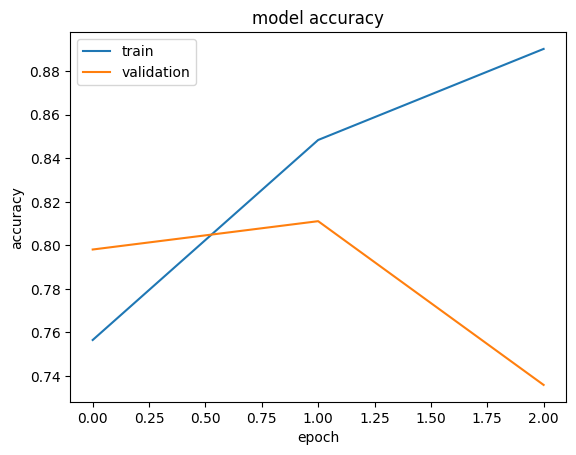

In [24]:
hist = model.fit(
    TRAIN,
    validation_data = VALIDATION,
    epochs=3,
    use_multiprocessing=True
)

plot_hist(hist)

In [14]:
model.evaluate(TEST)

1546/1546 [==============================] - 479s 308ms/step - loss: 1.2901 - binary_accuracy: 0.7330 - auc: 0.6856 - true_positives: 65391.0000 - true_negatives: 7101.0000 - false_positives: 21234.0000 - false_negatives: 5178.0000


[1.2901407480239868,
 0.7329531908035278,
 0.6855800151824951,
 65391.0,
 7101.0,
 21234.0,
 5178.0]

In [25]:
model.save('/kaggle/working/2023-05-03_GoodModel.h5')

# Section 2: Preparing and Training a Decision Tree

In [3]:
model = load_model('/kaggle/working/2023-05-03_GoodModel.h5')

In [4]:
#read the metadata and remove non-COAD rows
metadata_orig = pd.read_excel('/kaggle/input/metadata/TCGA-Metadata_for stage.xlsx', sheet_name='TCGA-CDR')
metadata_orig = metadata_orig[metadata_orig["type"].str.contains("COAD") == True]

In [5]:
class PATIENT:
    def __init__(self, barcode, age_at_dx, gender, race, stage, hist_type, dx_year, days_to_birth, alive, tumour_status, days_to_last_contact, days_to_death, treatment_outcome,
                OS, OS_time, DSS, DSS_time, DFI, DFI_time, PFI, PFI_time):
        self.DX = "NONE"
        self.SUBSET = "NONE"
        self.barcode = barcode
        self.age_at_dx = age_at_dx
        self.gender = gender
        self.race = race
        self.stage = stage
        self.hist_type = hist_type
        self.dx_year = dx_year
        self.days_to_birth = days_to_birth
        self.alive = alive
        self.tumour_status = tumour_status
        self.days_to_last_contact = days_to_last_contact
        self.days_to_death = days_to_death
        self.treatment_outcome = treatment_outcome
        self.OS = OS
        self.OS_time = OS_time
        self.DSS = DSS
        self.DSS_time = DSS_time
        if(DFI != None or DFI != '#N/A'):
            self.DFI = DFI
        else:
            self.DFI = -1
        self.DFI_time = DFI_time
        self.PFI = PFI
        self.PFI_time = PFI_time
        self.images = []
        self.image_pred = -1
        
    def find_dx_and_subset(self, dir_train, dir_test):
        self.go_through_dir(dir_train)
        self.go_through_dir(dir_test)
        
    def go_through_dir(self, directory):
        for subdir, dirs, files in os.walk(directory):
            for file in files:
                splits = file.split('-')
                barcode = splits[-6] + "-" + splits[-5] + "-" + splits[-4]
                if(self.barcode == barcode):
                    splits = subdir.split('/')
                    dx = splits[-1]
                    subset = splits[-2]
                    if("train".casefold() in subset.casefold()):
                        subset = "TRAIN"
                    elif("test".casefold() in subset.casefold()):
                        subset = "TEST"
                    else:
                        subset = "-------------- ERROR --------------"
                    self.SUBSET = subset
                    self.DX = dx                
    
    def get_images(self, dir_train, dir_test):
        directory = ""
        if(self.SUBSET == "TRAIN"):
            directory = dir_train
        else:
            directory = dir_test
            
        for subdir, dirs, files in os.walk(directory):
            for file in files:
                if(self.barcode in file):
                    self.images.append(os.path.join(subdir, file))
                    
    def show(self):
        print("---------------------------------")
        pprint(vars(self))
        
    def show_little(self):
        print("------------")
        print("Barcode: ", self.barcode)
        print(self.SUBSET, self.DX, " Images: ", len(self.images))
        print("Score: ", self.image_pred)

In [6]:
patients = []

metadata = metadata_orig
metadata = metadata.reset_index()

for index, row in metadata.iterrows():
    patients.append(PATIENT(
        row["bcr_patient_barcode"],
        row["age_at_initial_pathologic_diagnosis"],
        row["gender"],
        row["race"],
        row["ajcc_pathologic_tumor_stage"],
        row["histological_type"],
        row["initial_pathologic_dx_year"],
        row["birth_days_to"],
        row["vital_status"],
        row["tumor_status"],
        row["last_contact_days_to"],
        row["death_days_to"],
        row["treatment_outcome_first_course"],
        row["OS"],
        row["OS.time"],
        row["DSS"],
        row["DSS.time"],
        row["DFI"],
        row["DFI.time"],
        row["PFI"],
        row["PFI.time"]
    ))

In [7]:
for PATIENT in patients:
    PATIENT.find_dx_and_subset(train_data_dir, test_data_dir)

In [9]:
patients_final = [PATIENT for PATIENT in patients if PATIENT.DX != "NONE" or PATIENT.SUBSET != "NONE"]

In [10]:
for PATIENT in patients_final:
    PATIENT.get_images(train_data_dir, test_data_dir) #get images from image folders

In [12]:
patients_final = [PATIENT for PATIENT in patients if len(PATIENT.images) > 0]

In [ ]:
for PATIENT in patients_final:
    predictions = []
    batch_size = 64
    for i in range(0, len(PATIENT.images), batch_size):
        batch_images = PATIENT.images[i:i+batch_size]
        batch_np_images = []
        for image in batch_images:
            np_image = Image.open(image)
            np_image = np.array(np_image).astype('float32')/255
            np_image = np.expand_dims(np_image, axis=0)
            batch_np_images.append(np_image)
        batch_pred = model.predict(np.vstack(batch_np_images), verbose = 1)
        for prediction in batch_pred:
            predictions.append(prediction[0])
        
    PATIENT.image_pred = sum(predictions)/len(predictions)

In [177]:
df = pd.DataFrame([vars(patient) for patient in patients_final])
df = df.drop('images', axis=1)

df = df.drop(['OS'], axis = 1)
df = df.drop(['OS_time'], axis = 1)
df = df.drop(['DSS'], axis = 1)
df = df.drop(['DSS_time'], axis = 1)
df = df.drop(['DFI'], axis = 1)
df = df.drop(['DFI_time'], axis = 1)
df = df.drop(['PFI'], axis = 1)
df = df.drop(['PFI_time'], axis = 1)

df = df.replace({'#N/A': -1}, regex=True)
df = df.replace({'[Not Available]': -1}) 
df = df.replace({'[Unknown]': -1}) 
df = df.replace({'[Discrepancy]': -1})
df.fillna(-1, inplace=True)

print(df.columns.tolist())

df = pd.get_dummies(df, columns=['gender',
                                'race', 
                                'stage',
                                'hist_type',
                                'alive',
                                'tumour_status',
                                'treatment_outcome'], dummy_na=True)

df['DX'] = np.where(df['DX']== 'MSIMUT', 1, 0)

df_TRAIN = df[df['SUBSET'] == "TRAIN"]
df_TEST = df[df['SUBSET'] == "TEST"]

df_TRAIN = df_TRAIN.drop(['SUBSET'], axis = 1)
df_TEST = df_TEST.drop(['SUBSET'], axis = 1)
df_TRAIN = df_TRAIN.drop(['barcode'], axis = 1)
df_TEST = df_TEST.drop(['barcode'], axis = 1)

['DX', 'SUBSET', 'barcode', 'age_at_dx', 'gender', 'race', 'stage', 'hist_type', 'dx_year', 'days_to_birth', 'alive', 'tumour_status', 'days_to_last_contact', 'days_to_death', 'treatment_outcome', 'image_pred']


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.columns.tolist())
    display(df)

In [180]:
print(df.groupby('DX')['image_pred'].mean())

DX
0    0.937048
1    0.651121
Name: image_pred, dtype: float64


In [181]:
DXs = df.DX
Predx = np.round(df.image_pred)
#i flip this because my cnn  component outputs 0 and 1, but somewhere in the second part i output 1 and 0
Predx = np.logical_not(Predx).astype(int)

In [ ]:
data = {'predicted': Predx, 'true': DXs}
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(data))

In [184]:
TP = np.sum((Predx == 1) & (DXs == 1))
TN = np.sum((Predx == 0) & (DXs == 0))
FP = np.sum((Predx == 1) & (DXs == 0))
FN = np.sum((Predx == 0) & (DXs == 1))

In [185]:
print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

TP:  14
TN:  205
FP:  0
FN:  47


In [ ]:
# check for NaN values
print(df.isnull().sum())

In [ ]:
#this just prints
print("length TRAIN -->", len(df_TRAIN))
print("length TEST -->", len(df_TEST))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_TRAIN)
    print(df_TEST)

In [242]:
x_train = df_TRAIN.drop(['DX'], axis=1)
y_train = df_TRAIN.DX
x_test = df_TEST.drop(['DX'], axis=1)
y_test = df_TEST.DX

clf = DecisionTreeClassifier(criterion='gini',
                             random_state=5, 
                             min_samples_split=2, 
                             splitter='best',
                             max_depth = 10)
clf.fit(x_train, y_train)
Preds = clf.predict(x_test)

print(clf.score(x_test, y_test))
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, Preds))
print("F1:", sklearn.metrics.f1_score(y_test, Preds))
print("ROC_AUC:", sklearn.metrics.roc_auc_score(y_test, Preds))
print("Precision:", sklearn.metrics.precision_score(y_test, Preds))

#print(Train_data.shape)
#print(Test_data.shape)
#print(Train_answer.shape)
#print(Test_answer.shape)
#print(Preds.shape)
print(sklearn.tree.export_text(clf, feature_names=X_test.columns.tolist()))

0.8142857142857143
Accuracy: 0.8142857142857143
F1: 0.6829268292682927
ROC_AUC: 0.7590579710144929
Precision: 0.8235294117647058
|--- image_pred <= 0.70
|   |--- stage_Stage IIIC <= 0.79
|   |   |--- class: 1
|   |--- stage_Stage IIIC >  0.79
|   |   |--- class: 0
|--- image_pred >  0.70
|   |--- image_pred <= 0.86
|   |   |--- image_pred <= 0.76
|   |   |   |--- class: 1
|   |   |--- image_pred >  0.76
|   |   |   |--- image_pred <= 0.78
|   |   |   |   |--- class: 1
|   |   |   |--- image_pred >  0.78
|   |   |   |   |--- image_pred <= 0.84
|   |   |   |   |   |--- image_pred <= 0.81
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- image_pred >  0.81
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- image_pred >  0.84
|   |   |   |   |   |--- class: 0
|   |--- image_pred >  0.86
|   |   |--- class: 0

